In [1]:
input('Warning: contains solution spoilers. Press enter to continue.')
import numpy as np
import matplotlib.pyplot as plt

# Problem set 6

## Question 1

Here, we use a ghost point to implement periodic boundaries.

In [2]:
u = .5
dx = 0.01
Lx = 1.
x = np.arange(0, Lx+dx, dx)
sin_ic = lambda x: np.sin(2*np.pi*x)
saw_ic = lambda x: 2*x - 2*np.floor(x)

def upwind(ic, u=.5, dx=0.01, L=1, dt=0.01, T=1, snapshots=[]):
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(ic(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = u*dt/dx
    
    # Matrix for upwind
    M = (1-dtdx)*np.identity(n) + \
        dtdx*np.diag([1]*(n-1), -1) 

    # Enforce BC
    M[0,0] = 0.

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # upwind step
        phi[0] =  phi[-1] # enforce periodic BC

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list


def plot_phis(x, ts, phi_list):
    colors = plt.cm.magma(np.linspace(0, 1, len(phi_list)))
    for i, phi in enumerate(phi_list):
        plt.plot(x, phi, label=f"{ts[i]:.2f}", color=colors[i])
    plt.legend(loc='upper right')


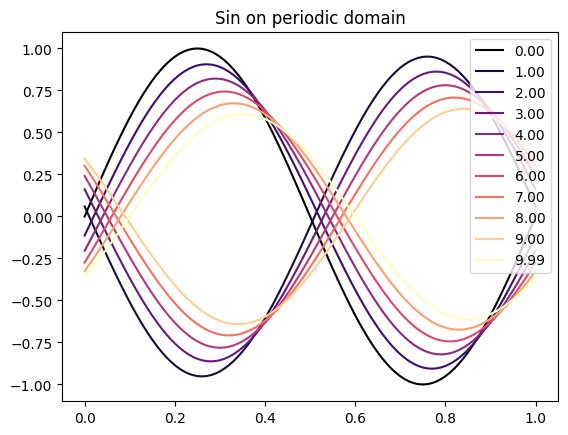

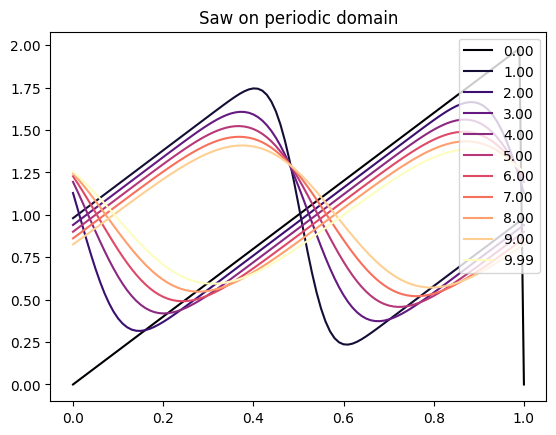

In [3]:
plt.title('Sin on periodic domain')
out = upwind(sin_ic, u=.51, dx=0.01, L=1, dt=0.01, T=10, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Saw on periodic domain')
out = upwind(saw_ic, u=.51, dx=0.01, L=1, dt=0.01, T=10, snapshots=10)
plot_phis(*out)
plt.show()

FTCS

In [4]:
def ftcs(ic, u=.5, dx=0.01, L=1, dt=0.01, T=1, snapshots=[]):
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(ic(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = u*dt/(2*dx)
    
    # Matrix for ftcs
    M = np.identity(n) + \
        -dtdx*np.diag([1]*(n-1), 1) +\
        dtdx*np.diag([1]*(n-1), -1)

    # # Enforce BC
    # M[0,0] = 0.
    # M[-1,-1] = 1- dt/dx * u

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # upwind step
        phi[0] = phi[-1]  # periodic bc

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list

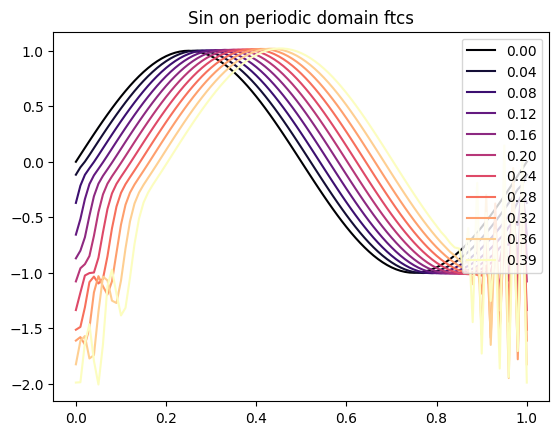

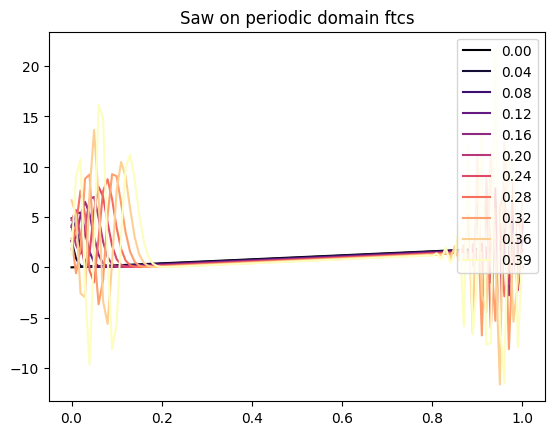

In [5]:
plt.title('Sin on periodic domain ftcs')
out = ftcs(sin_ic, u=.51, dx=0.01, L=1, dt=0.01, T=0.4, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Saw on periodic domain ftcs')
out = ftcs(saw_ic, u=.51, dx=0.01, L=1, dt=0.01, T=0.4, snapshots=10)
plot_phis(*out)
plt.show()

## Question 2

In [6]:
def btcs(ic, u=.5, dx=0.01, L=1, dt=0.01, T=1, snapshots=[]):
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(ic(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = u*dt/(2*dx)
    
    # Matrix for btcs
    M = np.identity(n) + \
        +dtdx*np.diag([1]*(n-1), 1) +\
        -dtdx*np.diag([1]*(n-1), -1)

    # Enforce BC
    M[0, -1] = -dtdx
    M[-1, 0] = dtdx

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = np.linalg.solve(M, phi)  # step

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list

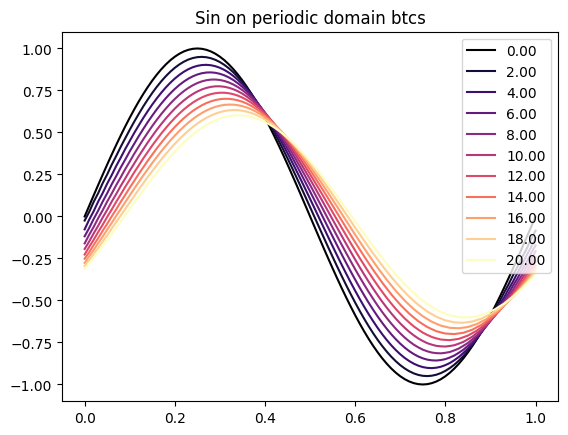

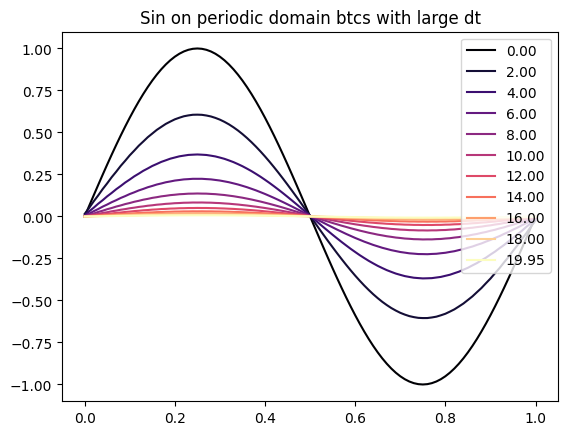

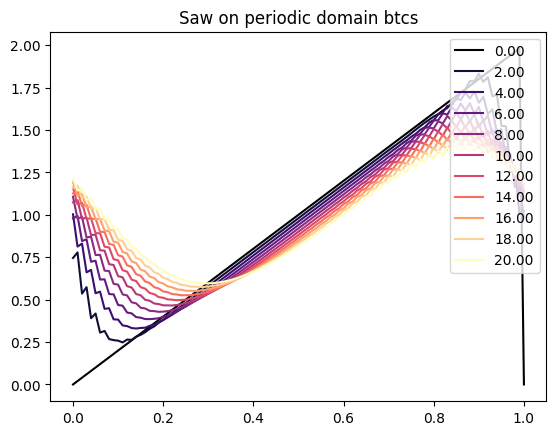

In [13]:
plt.title('Sin on periodic domain btcs')
out = btcs(sin_ic, u=.51, dx=0.01, L=1, dt=0.005, T=20, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Sin on periodic domain btcs with large dt')
out = btcs(sin_ic, u=.51, dx=0.01, L=1, dt=0.05, T=20, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Saw on periodic domain btcs')
out = btcs(saw_ic, u=.51, dx=0.01, L=1, dt=0.005, T=20, snapshots=10)
plot_phis(*out)
plt.show()

## Question 3

(heat equation)

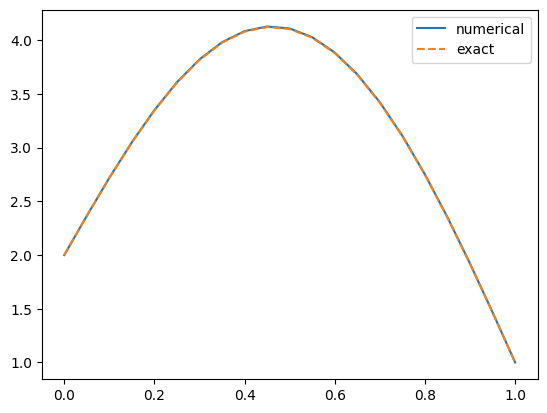

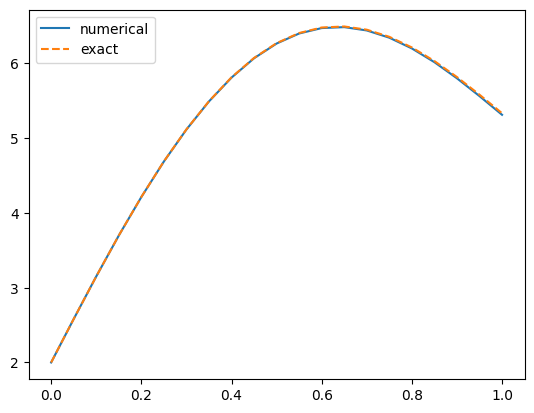

Unstable, check dt


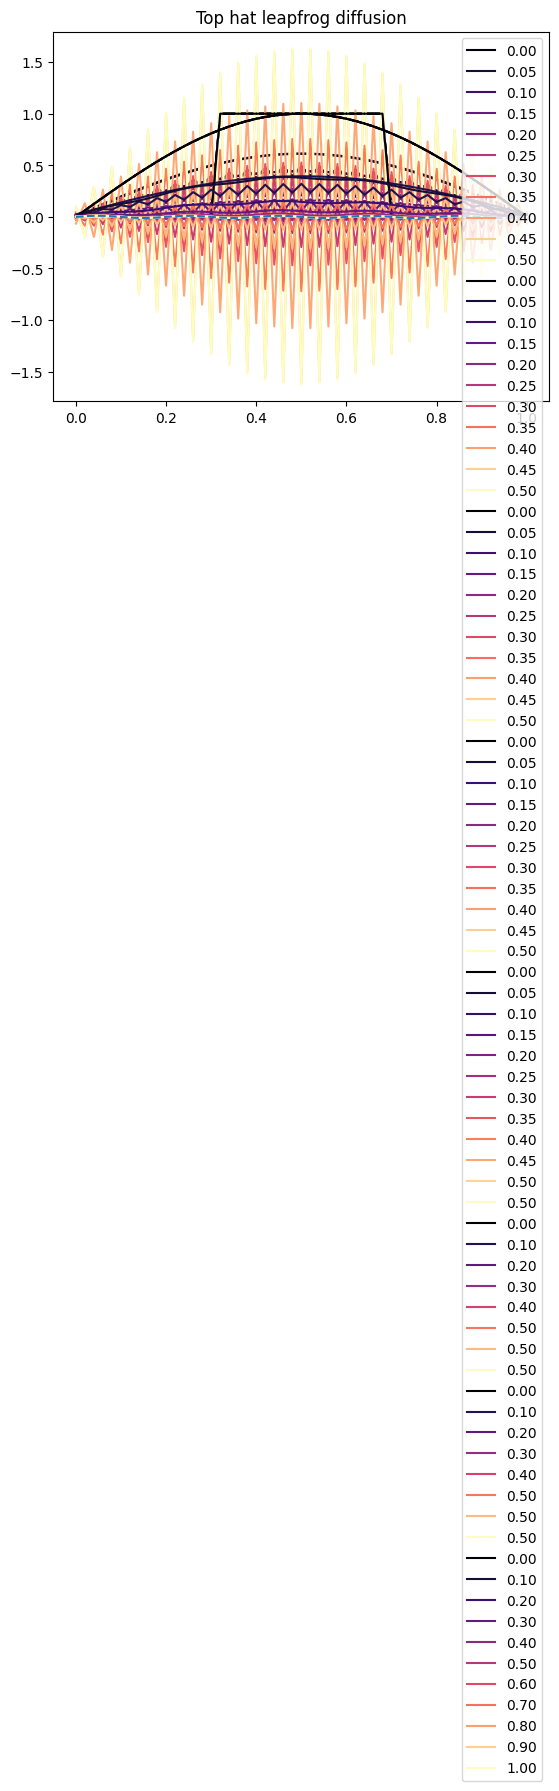

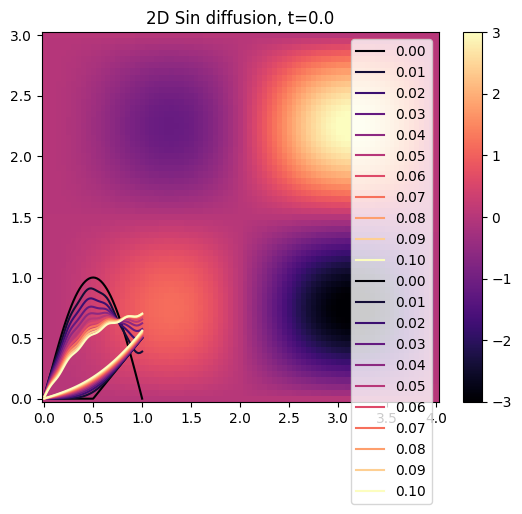

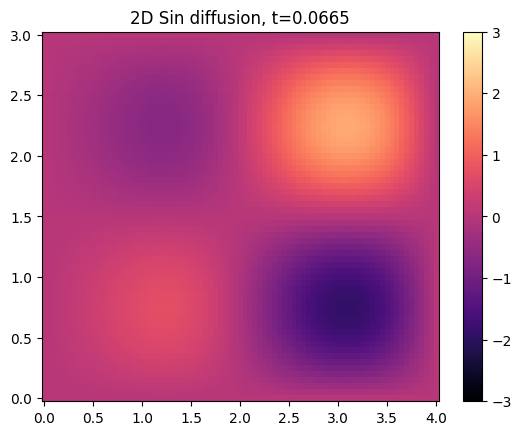

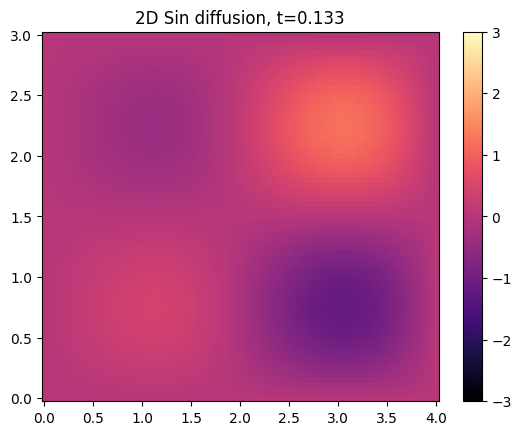

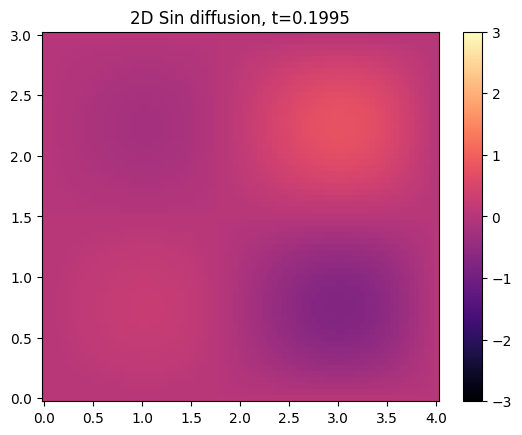

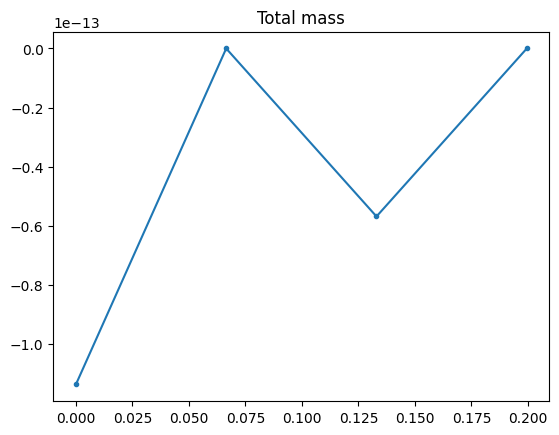

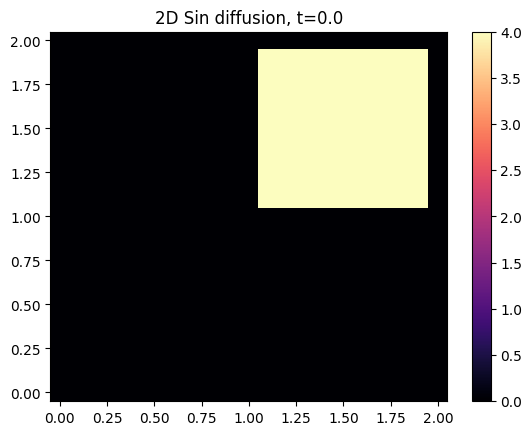

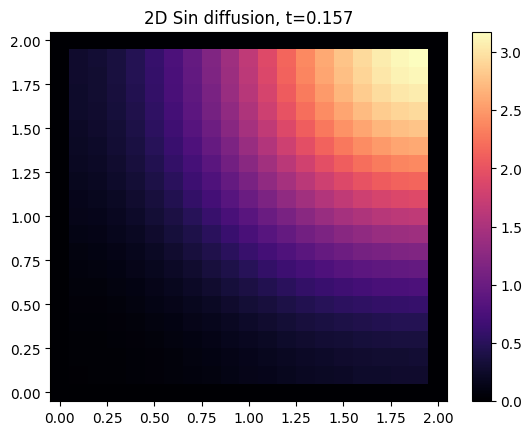

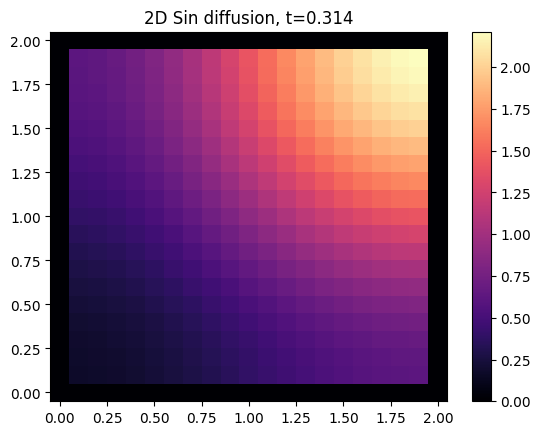

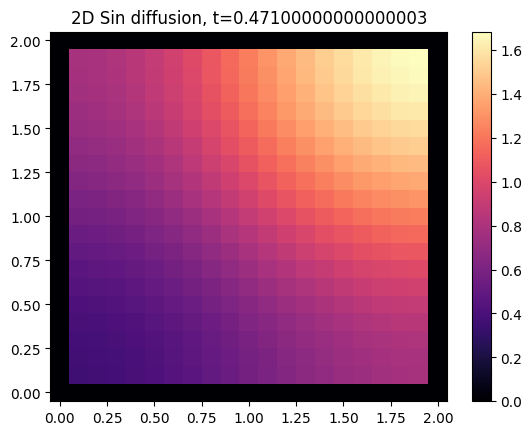

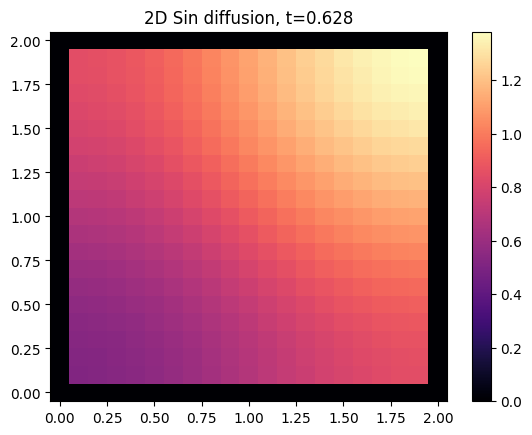

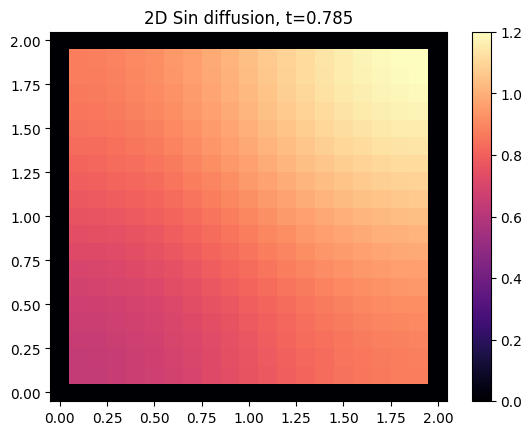

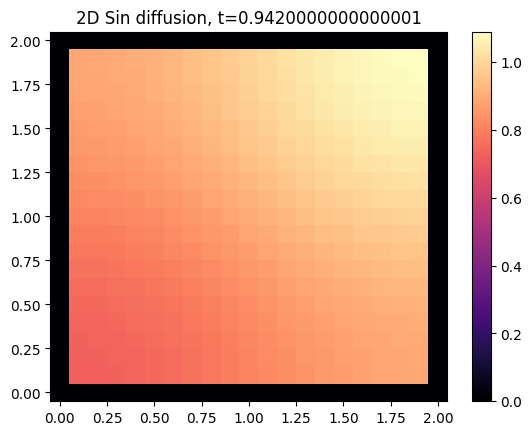

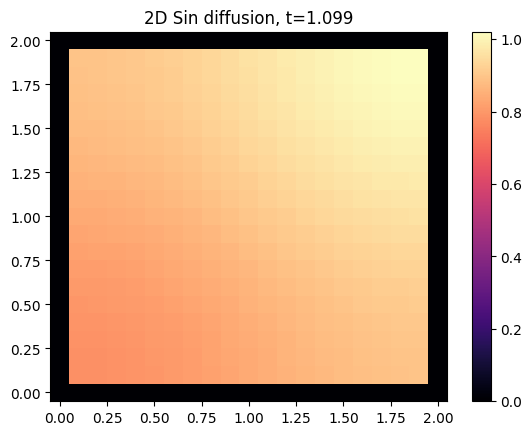

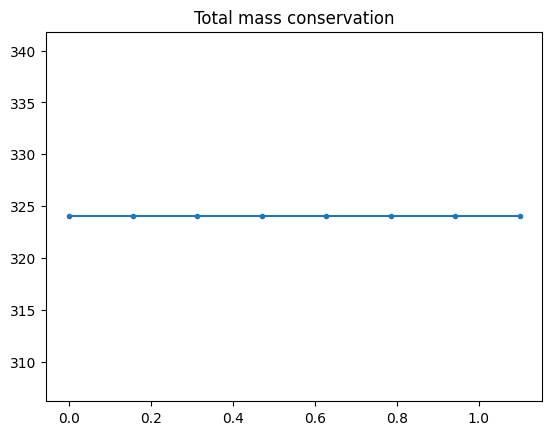

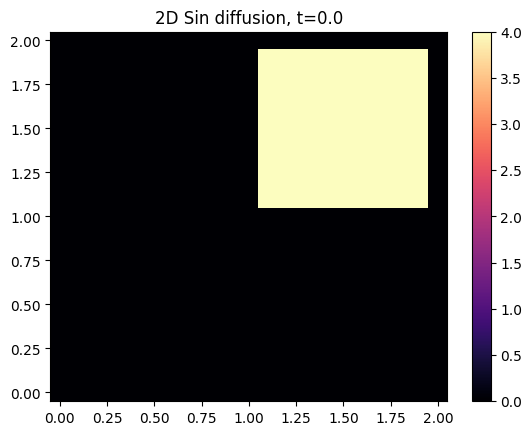

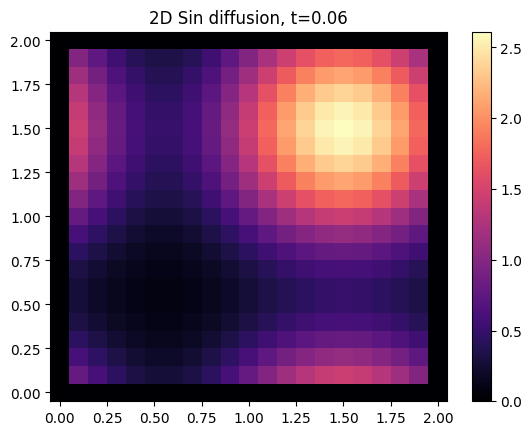

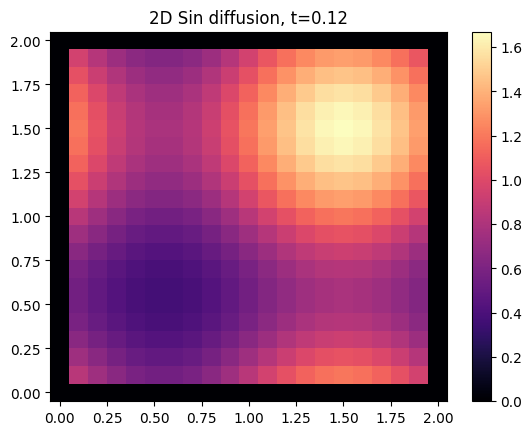

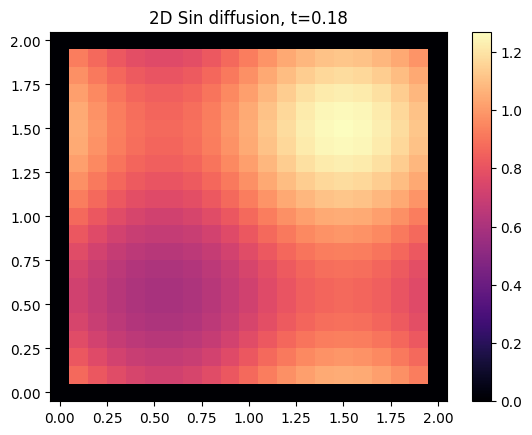

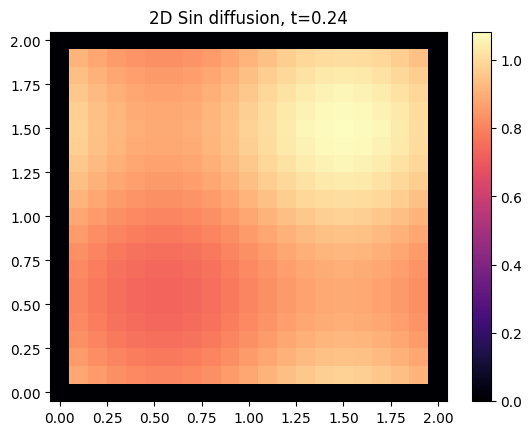

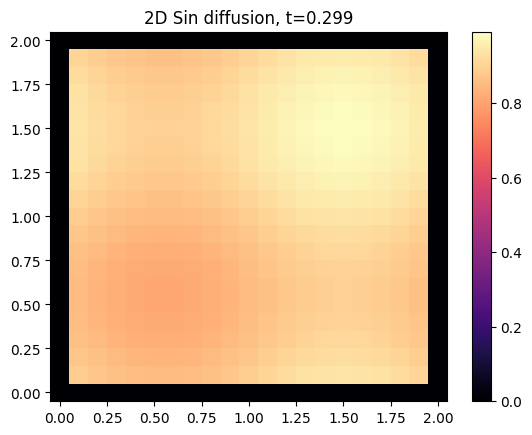

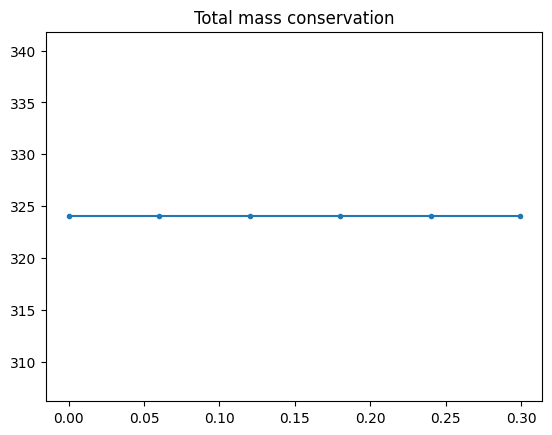

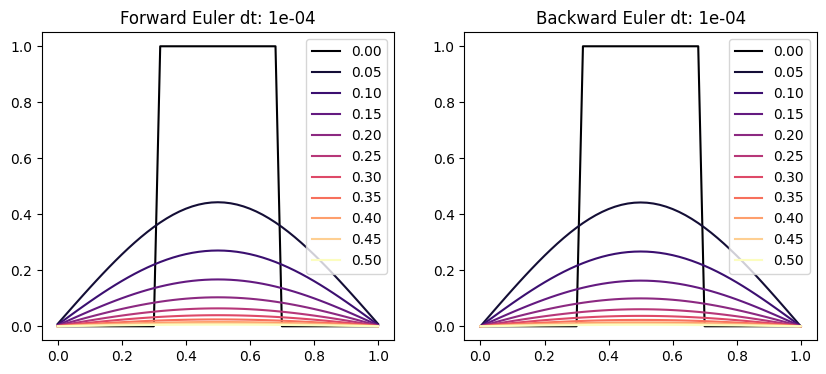

Unstable, check dt


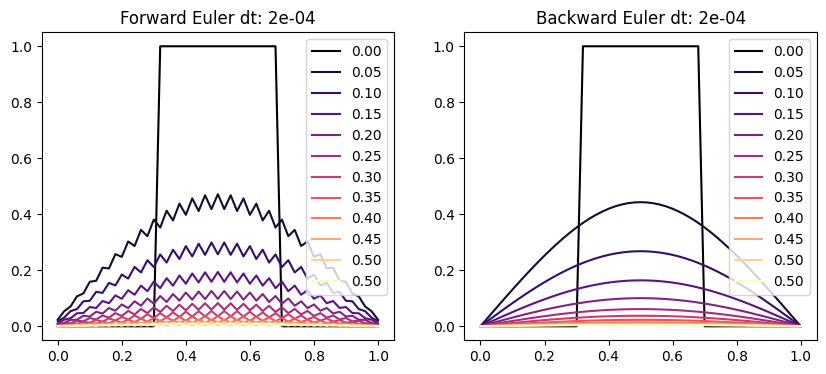

Unstable, check dt


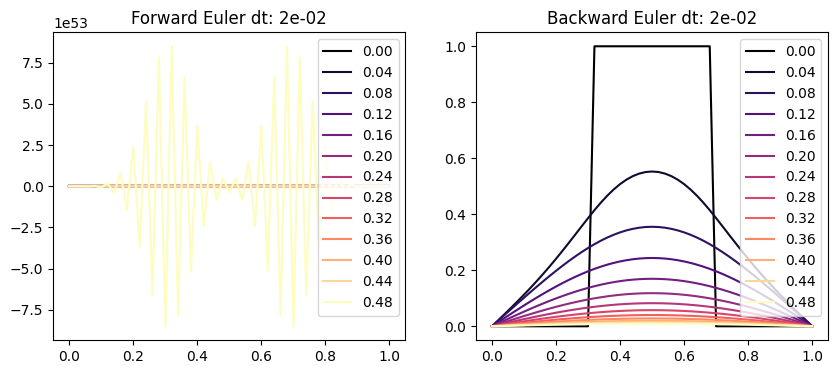

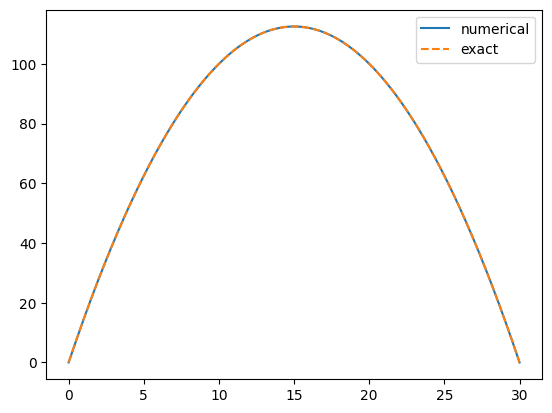

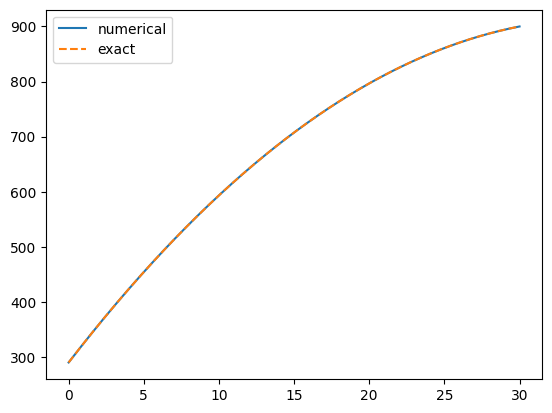

Heat flux at 0: 0.017604166666694482 W/m^2


In [15]:
# Get code from previous notebook to compare
# !pip install import-ipynb
import import_ipynb
from ps5 import diffusion_FE, diffusion_BE, plot_phis

In [ ]:
def diffusion_trap(phi_fn, k=1, dx=1, L=100, dt=0.01, T=50, snapshots=[], f=None):
    '''Diffusion equation crank-nicolson scheme'''
    if f is None:
        f = lambda x, t: 0
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)
    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(phi_fn(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = k*dt/dx**2
    
    # Matrix for FE
    N = (1-2*dtdx)*np.identity(n) + \
        dtdx*np.diag([1]*(n-1), 1) + \
        dtdx*np.diag([1]*(n-1), -1)
    
    # Enforce BC
    N[0,0], N[n-1,n-1] = 0., 0.

    # Matrix for BE
    M = (1-2*dtdx)*np.identity(n) + \
        dtdx*np.diag(np.ones(n-1), 1) + \
        dtdx*np.diag(np.ones(n-1), -1)
    
    # Enforce BC
    M[0,0], M[0,1] = 1, 0
    M[-1,-1], M[-1,-2] = 1, 0
    phi[0] = 0
    phi[-1] = 0

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # FE step
        phi += dt*f(x, t) # Add forcing

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list